## Settings

In [118]:
setwd("~/git/hist_future_hail/")                             # Working directory.
source("modules/gev_functions.R")                            # Load helper functions.
variables = c("hailcast_diam_max", "wind_10m")               # Variables to process.
results_dir = "/g/data/up6/tr2908/hist_future_hail/results/" # Results directory.
set.seed(42)                                                 # Random seed for reproducibility.

## Read in data

In [119]:
all_dat = read_feathers(results_dir = results_dir)

[1] "/g/data/up6/tr2908/hist_future_hail/results//Brisbane_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Brisbane_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Melbourne_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Melbourne_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Perth_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Perth_ssp245_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Sydney_Canberra_hist_block_maxima.feather"
[1] "/g/data/up6/tr2908/hist_future_hail/results//Sydney_Canberra_ssp245_block_maxima.feather"


## Timeseries of maxima

First the timeseries of daily hail diameter maxima.

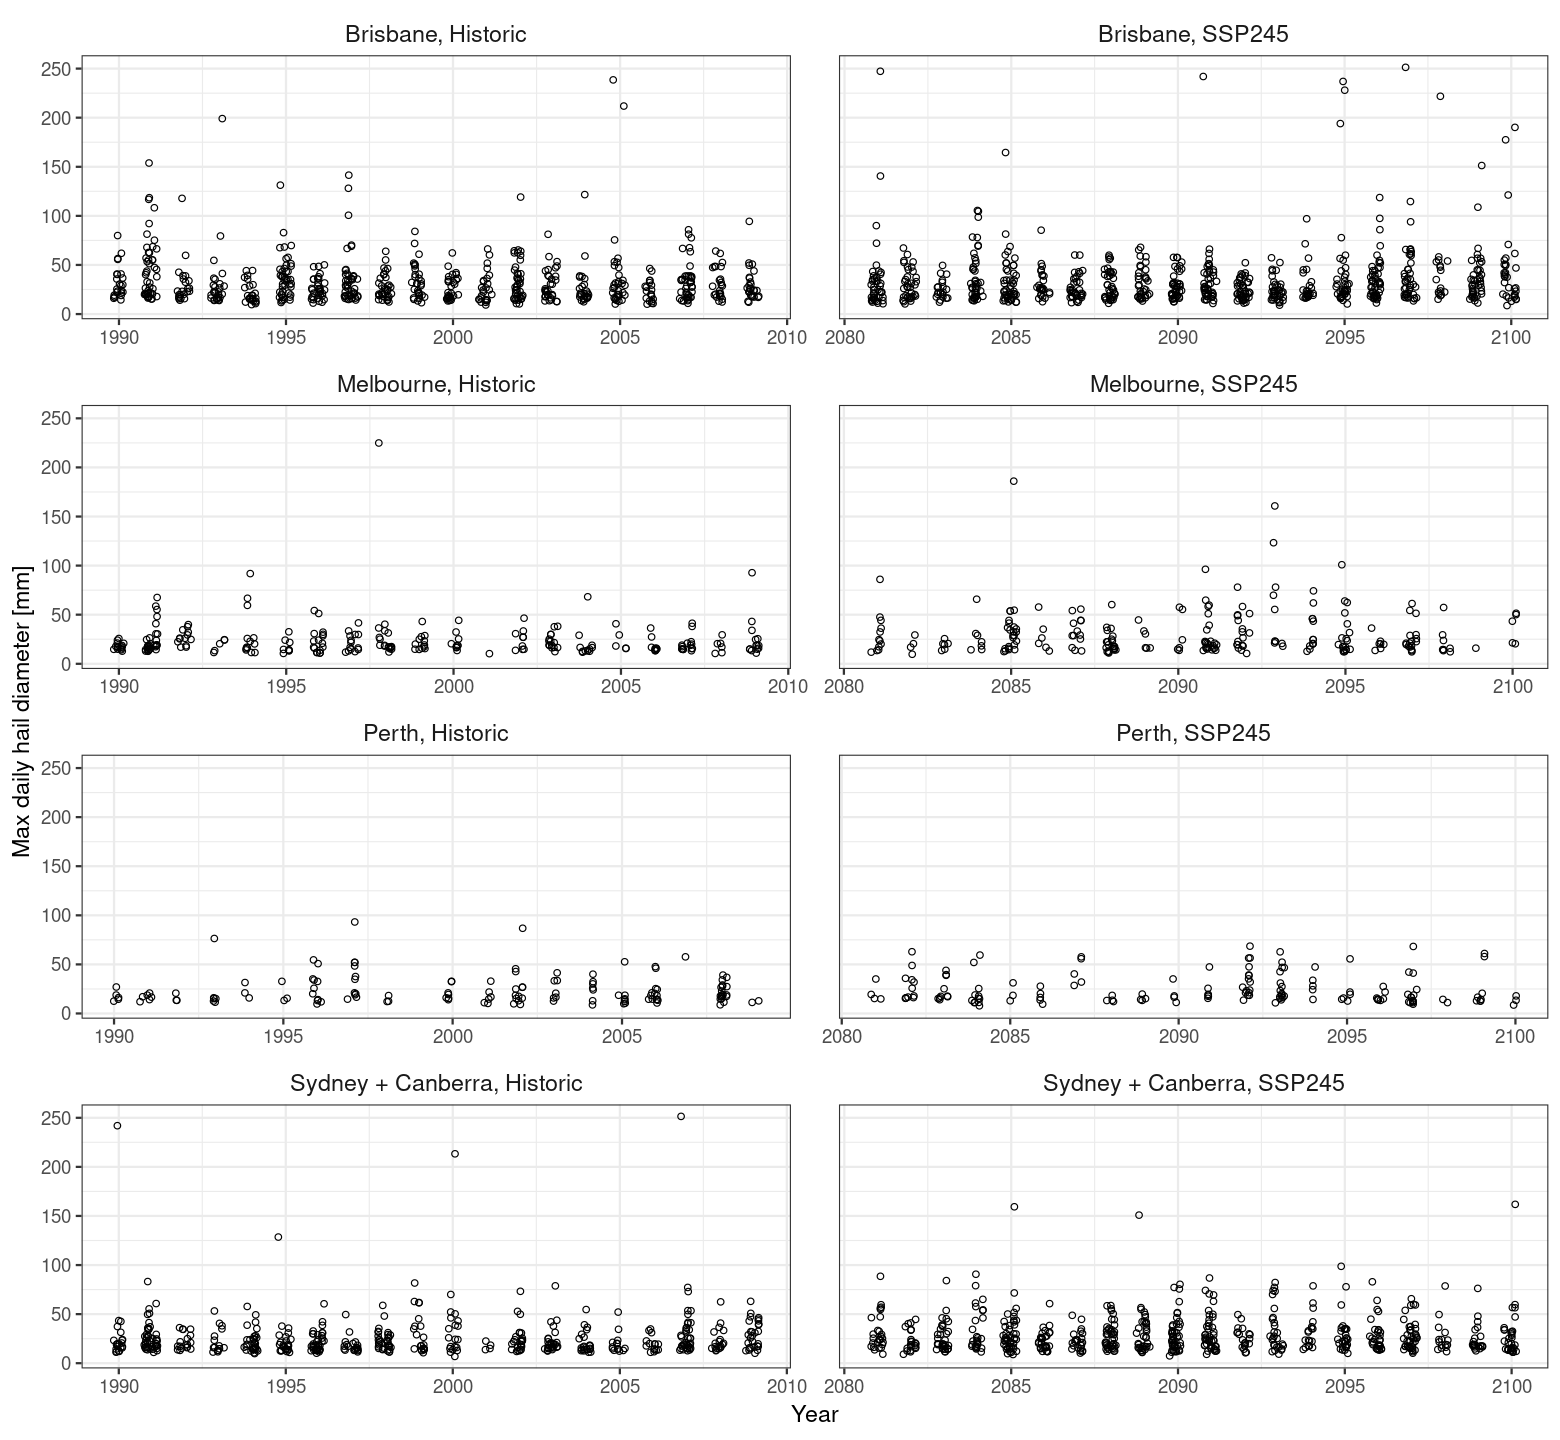

In [120]:
options(repr.plot.width = 13, repr.plot.height = 12)
plot_ts(
    dat = all_dat, ylabel = "Max daily hail diameter [mm]", var = "hailcast_diam_max",
    file = "paper/figures/timeseries_hail.pdf"
)

In [121]:
plot_ts(
    dat = all_dat, ylabel = "Max daily 10 m wind [m/s]", var = "wind_10m",
    file = "paper/figures/timeseries_wind.pdf"
)

## GEV fitting

In [ ]:
source("modules/gev_functions.R")
gev_fits = fit_gevs(all_dat = all_dat)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_params(gev_fits = gev_fits, file = "paper/figures/fit_params.pdf")

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_ks_fits(gev_fits = gev_fits, file = "paper/figures/fit_pvals.pdf")

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_quantiles(gev_fits = gev_fits, var = "hailcast_diam_max", unit = "mm", file = "paper/figures/qq_hail.pdf")

In [ ]:
plot_quantiles(gev_fits = gev_fits, var = "wind_10m", unit = "m~s^{-1}", file = "paper/figures/qq_wind.pdf")

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 4)
plot_return_levels(
    gev_fits = gev_fits, var = "hailcast_diam_max",
    varname = "Max~hail~size~group('[',mm,']')", file = "paper/figures/return_periods_hail.pdf"
)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 4)
plot_return_levels(
    gev_fits = gev_fits, var = "wind_10m",
    varname = "10~m~wind~group('[',m~s^{-1},']')", file = "paper/figures/return_periods_wind.pdf"
)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 3)
plot_hail_probs(gev_fits = gev_fits, file = "paper/figures/hail_probs.pdf")